In [2]:
import keras

In [ ]:
keras.callbacks.

In [ ]:
# 主要需要掌握的。
keras.callbacks.ModelCheckpoint # 不同时点保存模型的权重
keras.callbacks.EarlyStopping # 监控验证集多少次loss不下降，那么就停止了。
keras.callbacks.LearningRateScheduler
# 优化器的学习速率，在若干次训练过程中，若是loss无法下降，将学习速率减半
keras.callbacks.ReduceLROnPlateau 
keras.callbacks.CSVLogger

## The modelCheckpoint and EarlyStopping callbacks

In [12]:
from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [18]:
import keras

callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
    ),
    keras.callbacks.ModelCheckpoint(# 存储最好的模型(当前是loss最低的模型)
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,
         epochs=10,
         batch_size=32,
         callbacks=callbacks_list,
         validation_data=(val_images,val_labels))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 165us/step - loss: 13.3186 - acc: 0.1734 - val_loss: 12.9858 - val_acc: 0.1943
Epoch 2/10
48000/48000 [==============================] - 8s 167us/step - loss: 13.0388 - acc: 0.1909 - val_loss: 13.1019 - val_acc: 0.1867
Epoch 3/10
48000/48000 [==============================] - 8s 163us/step - loss: 13.0387 - acc: 0.1910 - val_loss: 13.0086 - val_acc: 0.1929
Epoch 4/10
48000/48000 [==============================] - 7s 150us/step - loss: 13.0611 - acc: 0.1896 - val_loss: 13.0042 - val_acc: 0.1931


In [19]:
val_loss,val_acc = model.evaluate(val_images,val_labels)
print("val_loss: ",val_loss)
print("val_acc: ",val_acc)

12000/12000 [==============================] - 0s 24us/step
val_loss:  13.004249181111653
val_acc:  0.19308333333333333


In [20]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print("test_loss: ",test_loss)
print("test_acc: ",test_acc)

10000/10000 [==============================] - 0s 24us/step
test_loss:  4.1780855052948
test_acc:  0.1897


In [21]:
model.load_weights("my_model.h5")

In [22]:
val_loss,val_acc = model.evaluate(val_images,val_labels)
print("val_loss: ",val_loss)
print("val_acc: ",val_acc)

12000/12000 [==============================] - 0s 24us/step
val_loss:  12.98581300608317
val_acc:  0.19433333333333333


In [24]:
test_loss,test_acc= model.evaluate(test_images,test_labels)
print("test_loss: ",test_loss)
print("test_acc: ",test_acc)

10000/10000 [==============================] - 0s 26us/step
test_loss:  2.980929991912842
test_acc:  0.1912


## The ReduceLROnPlateau callback

In [25]:
from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))

In [26]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,# 如果符合条件的化，学习速率变为原来的0.5
        verbose = 1, # 打印进度条
        patience = 2.
    )
]
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

model.fit(train_images,train_labels,
         epochs=10,
         batch_size=32,
         callbacks=callbacks_list,
         validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 146us/step - loss: 0.2225 - acc: 0.9346 - val_loss: 0.1153 - val_acc: 0.9649
Epoch 2/10
48000/48000 [==============================] - 7s 138us/step - loss: 0.0958 - acc: 0.9711 - val_loss: 0.0953 - val_acc: 0.9738
Epoch 3/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.0692 - acc: 0.9806 - val_loss: 0.0985 - val_acc: 0.9728
Epoch 4/10
48000/48000 [==============================] - 7s 145us/step - loss: 0.0528 - acc: 0.9852 - val_loss: 0.1016 - val_acc: 0.9752
Epoch 5/10
47616/48000 [============================>.] - ETA: 0s - loss: 0.0411 - acc: 0.9886
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
48000/48000 [==============================] - 7s 139us/step - loss: 0.0411 - acc: 0.9886 - val_loss: 0.1078 - val_acc: 0.9763
Epoch 6/10
48000/48000 [==============================] - 7s 141us/step - loss: 0.0224 - acc: 0.

## Writing your own callback

In [ ]:
keras.callbacks.Callback

In [ ]:
# 有点像生命周期中的钩子函数
on_epoch_begin # called at the start of every epoch
on_epoch_end # called at the end of every epoch

on_batch_begin # called right before processing each batch
on_batch_end # called right after processing each batch

on train_begin # call at the start of training
on_train_end # call at the end of traning

#### An example of a custom callbacks that saves to disk the activations of every layer of the model at the end of every epoch,computed on the first sample of the validation set:

In [28]:
import keras
import numpy as np

class ActivationLogger(keras.callbacks.Callback):
    
    def set_model(self,model):
        self.model = model # called by the parent model before training,to inform the callback of what model will be calling it
        layer_outputs = [layer.output for layer in model.layers]
        # Model instance that returns the activations of every layer
        self.activations_model = keras.models.Model(model.input,layer_outputs)
    
    def on_epoch_end(self,epoch,logs=None):
        if self.validation_data is None:
            raise RuntimeError("Requires validation data.")
        
        validation_sample = self.validation_data[0][0:1] # obtain the first input samples of the validation data.
        activations = self.activations_model.predict(validation_sample)
        f = open("activations_at_epoch+"+str(epoch)+".npz",'w')# save arrays to disk
        np.save(f,activations)
        f.close()

In [29]:
from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [30]:
history = ActivationLogger()

model.fit(train_images,train_labels,
         epochs=10,
         batch_size=32,
         callbacks=[history],
         validation_data=(val_images,val_labels))

Train on 60000 samples, validate on 12000 samples
Epoch 1/10
59648/60000 [============================>.] - ETA: 0s - loss: 0.2011 - acc: 0.9396

ValueError: could not broadcast input array from shape (512) into shape (1)

#### Another example

In [31]:
class LossHistory(keras.callbacks.Callback):
    # 当训练刚开始的时候执行
    def on_train_begin(self,logs={}):
        self.losses = []
    
    def on_batch_end(self,batch,logs={}):
        self.losses.append(logs.get("loss"))

In [32]:
from keras.datasets import mnist
import numpy as np

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [33]:
history = LossHistory()

model.fit(train_images,train_labels,
         batch_size=30000,epochs=2,verbose=1,callbacks=[history])
print(history.losses)

Epoch 1/2
60000/60000 [==============================] - 1s 17us/step - loss: 1.9961 - acc: 0.3367
Epoch 2/2
60000/60000 [==============================] - 0s 8us/step - loss: 1.2049 - acc: 0.6844
[2.3656263, 1.6265506, 1.2789369, 1.1309004]


### TensorBoard
可视化

In [34]:
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

In [37]:
max_features = 2000
max_len = 500

(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)
x_train = sequence.pad_sequences(x_train,maxlen=max_len)
x_test = sequence.pad_sequences(x_test,maxlen = max_len)

model = keras.models.Sequential()
'''
Embedding参数估计：
 2000*128 
'''
model.add(layers.Embedding(max_features,128,input_length=max_len,name='mebed'))
'''
(7*128 + 1) * 32
'''
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.MaxPooling1D(5))
'''
参数估计：
卷积核大小为：7*32
参数量为： (7*32 + 1) * 32
'''
model.add(layers.Conv1D(32,7,activation='relu'))
model.add(layers.GlobalMaxPooling1D())
'''
参数估计量为：
(1 * 32 + 1)*1 =33 
'''
model.add(layers.Dense(1))

model.summary()
model.compile(optimizer = 'rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mebed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
_________________________________________________________________


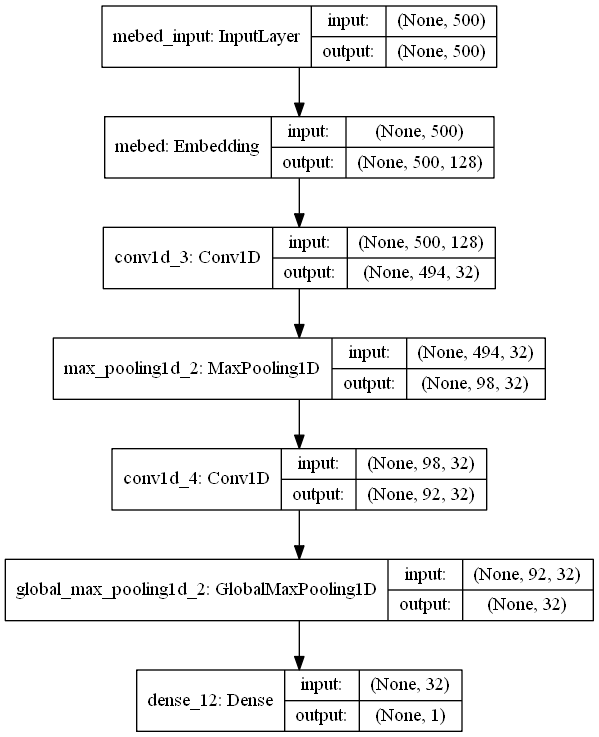

In [38]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='./images/7-2.png')

from IPython.display import Image
Image(filename='./images/7-2.png')

In [39]:
mkdir my_log_dir

In [40]:
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq = 1,
    )
]
history = model.fit(x_train,y_train,
                   epochs=20,
                   batch_size=128,
                   validation_split=0.2,
                   callbacks=callbacks)

Train on 20000 samples, validate on 5000 samples



Epoch 1/20
20000/20000 [==============================] - 43s 2ms/step - loss: 0.6461 - acc: 0.6497 - val_loss: 0.4408 - val_acc: 0.8264
Epoch 2/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.4403 - acc: 0.8201 - val_loss: 0.4299 - val_acc: 0.8236
Epoch 3/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.3764 - acc: 0.8044 - val_loss: 0.4763 - val_acc: 0.7882
Epoch 4/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.3463 - acc: 0.7764 - val_loss: 0.4891 - val_acc: 0.7560
Epoch 5/20
20000/20000 [==============================] - 41s 2ms/step - loss: 0.3186 - acc: 0.7241 - val_loss: 0.5312 - val_acc: 0.7006
Epoch 6/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2660 - acc: 0.6983 - val_loss: 0.6948 - val_acc: 0.6270
Epoch 7/20
20000/20000 [==============================] - 40s 2ms/step - loss: 0.2107 - acc: 0.6899 - val_loss: 0.7716 - val_a

在该日志目录下，打开dos窗口来做以下命令：

    tensorboard --logdir==my_log_dir
    
根据提示在浏览器打开地址。